#### MSTN wih fixed number of layers

- Metric optimized: AUC

- Number of random evaluations: 20

- Model optimized: single_tel

- Iterations performed: 100 
 
- Space of hyperparameters to optimize: 
    - number of filters layer 1: [16, 64] 
    - number of filters layer 2: [16, 128]
    - number of filters layer 3: [16, 256]
    - number of filters layer 4: [16, 512]
    - kernel size layer 1: [2,10] 
    - kernel size layer 2: [2,10] 
    - kernel size layer 3: [2,10] 
    - kernel size layer 4: [2,10].

#### MSTN wih optimized number of layers

- Metric optimized: AUC

- Number of random evaluations: 50

- Model optimized: single_tel

- Iterations performed: 150 
 
- Space of hyperparameters to optimize: 
    - number of layers: [4,6]
    - number of filters layer 1: [16, 120] 
    - number of filters layer 2: [16, 180]
    - number of filters layer 3: [16, 250]
    - number of filters layer 4: [16, 300]
    - number of filters layer 5: [16, 350]
    - number of filters layer 6: [16, 400]
    - kernel size layer 1: [2,12] 
    - kernel size layer 2: [2,12] 
    - kernel size layer 3: [2,12] 
    - kernel size layer 4: [2,12].
    - kernel size layer 5: [2,12] 
    - kernel size layer 6: [2,12].


#### Results:


|Hyperparameters |Telescope Type | Validation Accuracy | Validation AUC | Training Time|
|---|---|---|---|---|
|Base|MSTN fixed layers|78.04%|0.8659|0h 58m 10s|
|Optimized|MSTN fixed layers|80.11%|0.8929|0h 52m 48s|
|Base|MSTN optimized layers|78.04%|0.8659|0h 58m 10s|
|Optimized|MSTN optimized layers|80.53%|0.8957|0h 55m 01s|
  

|Telescope Type | Model  |Filters 1|Filters 2|Filters 3|Filters 4| Kernel size 1 | Kernel size 2 | Kernel size 3|Kernel size 4|
|---|---|---|---|---|---|---|---|---|---|
|MSTN fixed layers|Base|32|32|64|128| 3| 3 |3 | 3|
|MSTN fixed layers|Optimized|58|109|183|315|5|8|8|4|

|Telescope Type | Model  |Number of layers|Filters 1|Filters 2|Filters 3|Filters 4|Filters 5|Filters 6| Kernel size 1 | Kernel size 2 | Kernel size 3|Kernel size 4|Kernel size 5|Kernel size 6|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|MSTN optimized layers|Base|4|32|32|64|128| -| -| 3| 3 |3 | 3| -| -|
|MSTN optimized layers|Optimized|6|93|104|135|186|236|77|5|6|8|6|7|4|


|Telescope Type |Metric |Improvement |
|---|---|---|
|MSTN fixed layers|Validation Accuracy |2.07%|
|MSTN fixed layers|Validation AUC| 2.70%|
|MSTN optimized layers|Validation Accuracy |2.50%|
|MSTN optimized layers|Validation AUC| 2.98%|


In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skopt.plots import plot_evaluations, plot_objective
from ctlearn_optimizer.auxiliar_functions import df2result, plot_convergence
pd.set_option('display.max_columns', None)

mstn = pd.read_csv('mstn.csv')
mstn_layers = pd.read_csv('mstn_layers.csv')

mstn_layers_result = df2result(mstn_layers, 
                       metric_col = 'auc_val', 
                       param_cols = ['number_of_layers', 'layer1_filters', 'layer1_kernel', 'layer2_filters', 
                                     'layer2_kernel','layer3_filters', 'layer3_kernel', 'layer4_filters', 
                                     'layer4_kernel','layer5_filters', 'layer5_kernel', 'layer6_filters',
                                     'layer6_kernel'])

mstn_result = df2result(mstn, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])

In [5]:
# NectarCam with optimized number of layers
mstn_layers_sorted = mstn_layers.sort_values('auc_val', ascending = False)
mstn_layers_sorted.head(10)

,loss,iteration,number_of_layers,layer1_filters,layer2_filters,layer3_filters,layer4_filters,layer5_filters,layer6_filters,layer1_kernel,layer2_kernel,layer3_kernel,layer4_kernel,layer5_kernel,layer6_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
144,0.104251,145,6.0,93.0,104.0,135.0,186.0,236.0,77.0,5.0,6.0,8.0,6.0,7.0,4.0,0.895749,0.805351,0.841754,0.771226,0.804171,3301.817356
93,0.105087,94,6.0,80.0,173.0,143.0,80.0,320.0,36.0,6.0,9.0,11.0,9.0,9.0,7.0,0.894913,0.800352,0.867041,0.737838,0.814817,4600.279769
117,0.105103,118,6.0,70.0,164.0,185.0,118.0,228.0,67.0,6.0,7.0,10.0,6.0,8.0,12.0,0.894897,0.804150,0.829544,0.780346,0.809021,3774.527311
100,0.105226,101,6.0,84.0,140.0,153.0,111.0,294.0,47.0,5.0,9.0,11.0,10.0,12.0,7.0,0.894774,0.804337,0.845944,0.765334,0.811080,4481.448976
103,0.105286,104,6.0,81.0,176.0,161.0,105.0,349.0,50.0,5.0,6.0,11.0,8.0,9.0,9.0,0.894714,0.803941,0.833398,0.776328,0.807682,3854.511910
137,0.105337,138,5.0,96.0,123.0,147.0,48.0,169.0,0.0,9.0,7.0,6.0,12.0,9.0,0.0,0.894664,0.802869,0.849268,0.759374,0.811531,3321.334189
126,0.105431,127,6.0,58.0,157.0,215.0,24.0,316.0,25.0,6.0,7.0,9.0,5.0,8.0,10.0,0.894569,0.804325,0.834915,0.775651,0.809498,3403.814168
113,0.105487,114,6.0,75.0,141.0,143.0,84.0,261.0,87.0,3.0,7.0,12.0,9.0,12.0,11.0,0.894513,0.805584,0.812687,0.798925,0.812397,3522.742592
129,0.105619,130,6.0,98.0,165.0,204.0,86.0,302.0,134.0,8.0,9.0,6.0,4.0,6.0,6.0,0.894381,0.799839,0.864729,0.739012,0.815992,5223.736457
79,0.105653,80,6.0,79.0,131.0,68.0,135.0,212.0,166.0,5.0,8.0,12.0,11.0,7.0,3.0,0.894347,0.804244,0.784727,0.822539,0.823944,3155.163906


In [6]:
# NectarCam with fixed number of layers
mstn_sorted = mstn.sort_values('auc_val', ascending = False)
mstn_sorted.head(10)

,iteration,loss,layer1_filters,layer1_kernel,layer2_filters,layer2_kernel,layer3_filters,layer3_kernel,layer4_filters,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
83,84,0.107111,58.0,5.0,109.0,8.0,183.0,8.0,315.0,4.0,0.892889,0.801051,0.858612,0.747094,0.821363,3167.990778
82,83,0.107507,59.0,6.0,124.0,7.0,189.0,10.0,207.0,4.0,0.892493,0.797940,0.868293,0.731991,0.827550,3159.622981
71,72,0.107807,62.0,6.0,94.0,6.0,204.0,10.0,130.0,4.0,0.892193,0.802589,0.827305,0.779421,0.819639,3043.263056
63,64,0.108042,49.0,5.0,109.0,5.0,204.0,6.0,414.0,4.0,0.891958,0.802729,0.824535,0.782288,0.819942,6947.555477
33,34,0.108045,44.0,10.0,120.0,6.0,194.0,10.0,133.0,10.0,0.891955,0.802461,0.792506,0.811793,0.825479,5820.490232
96,97,0.108167,61.0,6.0,76.0,7.0,197.0,7.0,252.0,4.0,0.891833,0.802496,0.814661,0.791092,0.821688,3053.249457
53,54,0.108297,50.0,8.0,86.0,6.0,234.0,9.0,186.0,5.0,0.891703,0.801925,0.818274,0.786600,0.821696,5546.827348
85,86,0.108307,57.0,6.0,99.0,10.0,144.0,10.0,236.0,5.0,0.891693,0.800771,0.846908,0.757523,0.823168,3306.023628
75,76,0.108362,54.0,4.0,111.0,4.0,146.0,10.0,473.0,4.0,0.891638,0.803218,0.817985,0.789376,0.821627,3045.882030
87,88,0.108501,60.0,5.0,122.0,9.0,219.0,10.0,295.0,5.0,0.891499,0.801750,0.834481,0.771068,0.821353,4626.238879


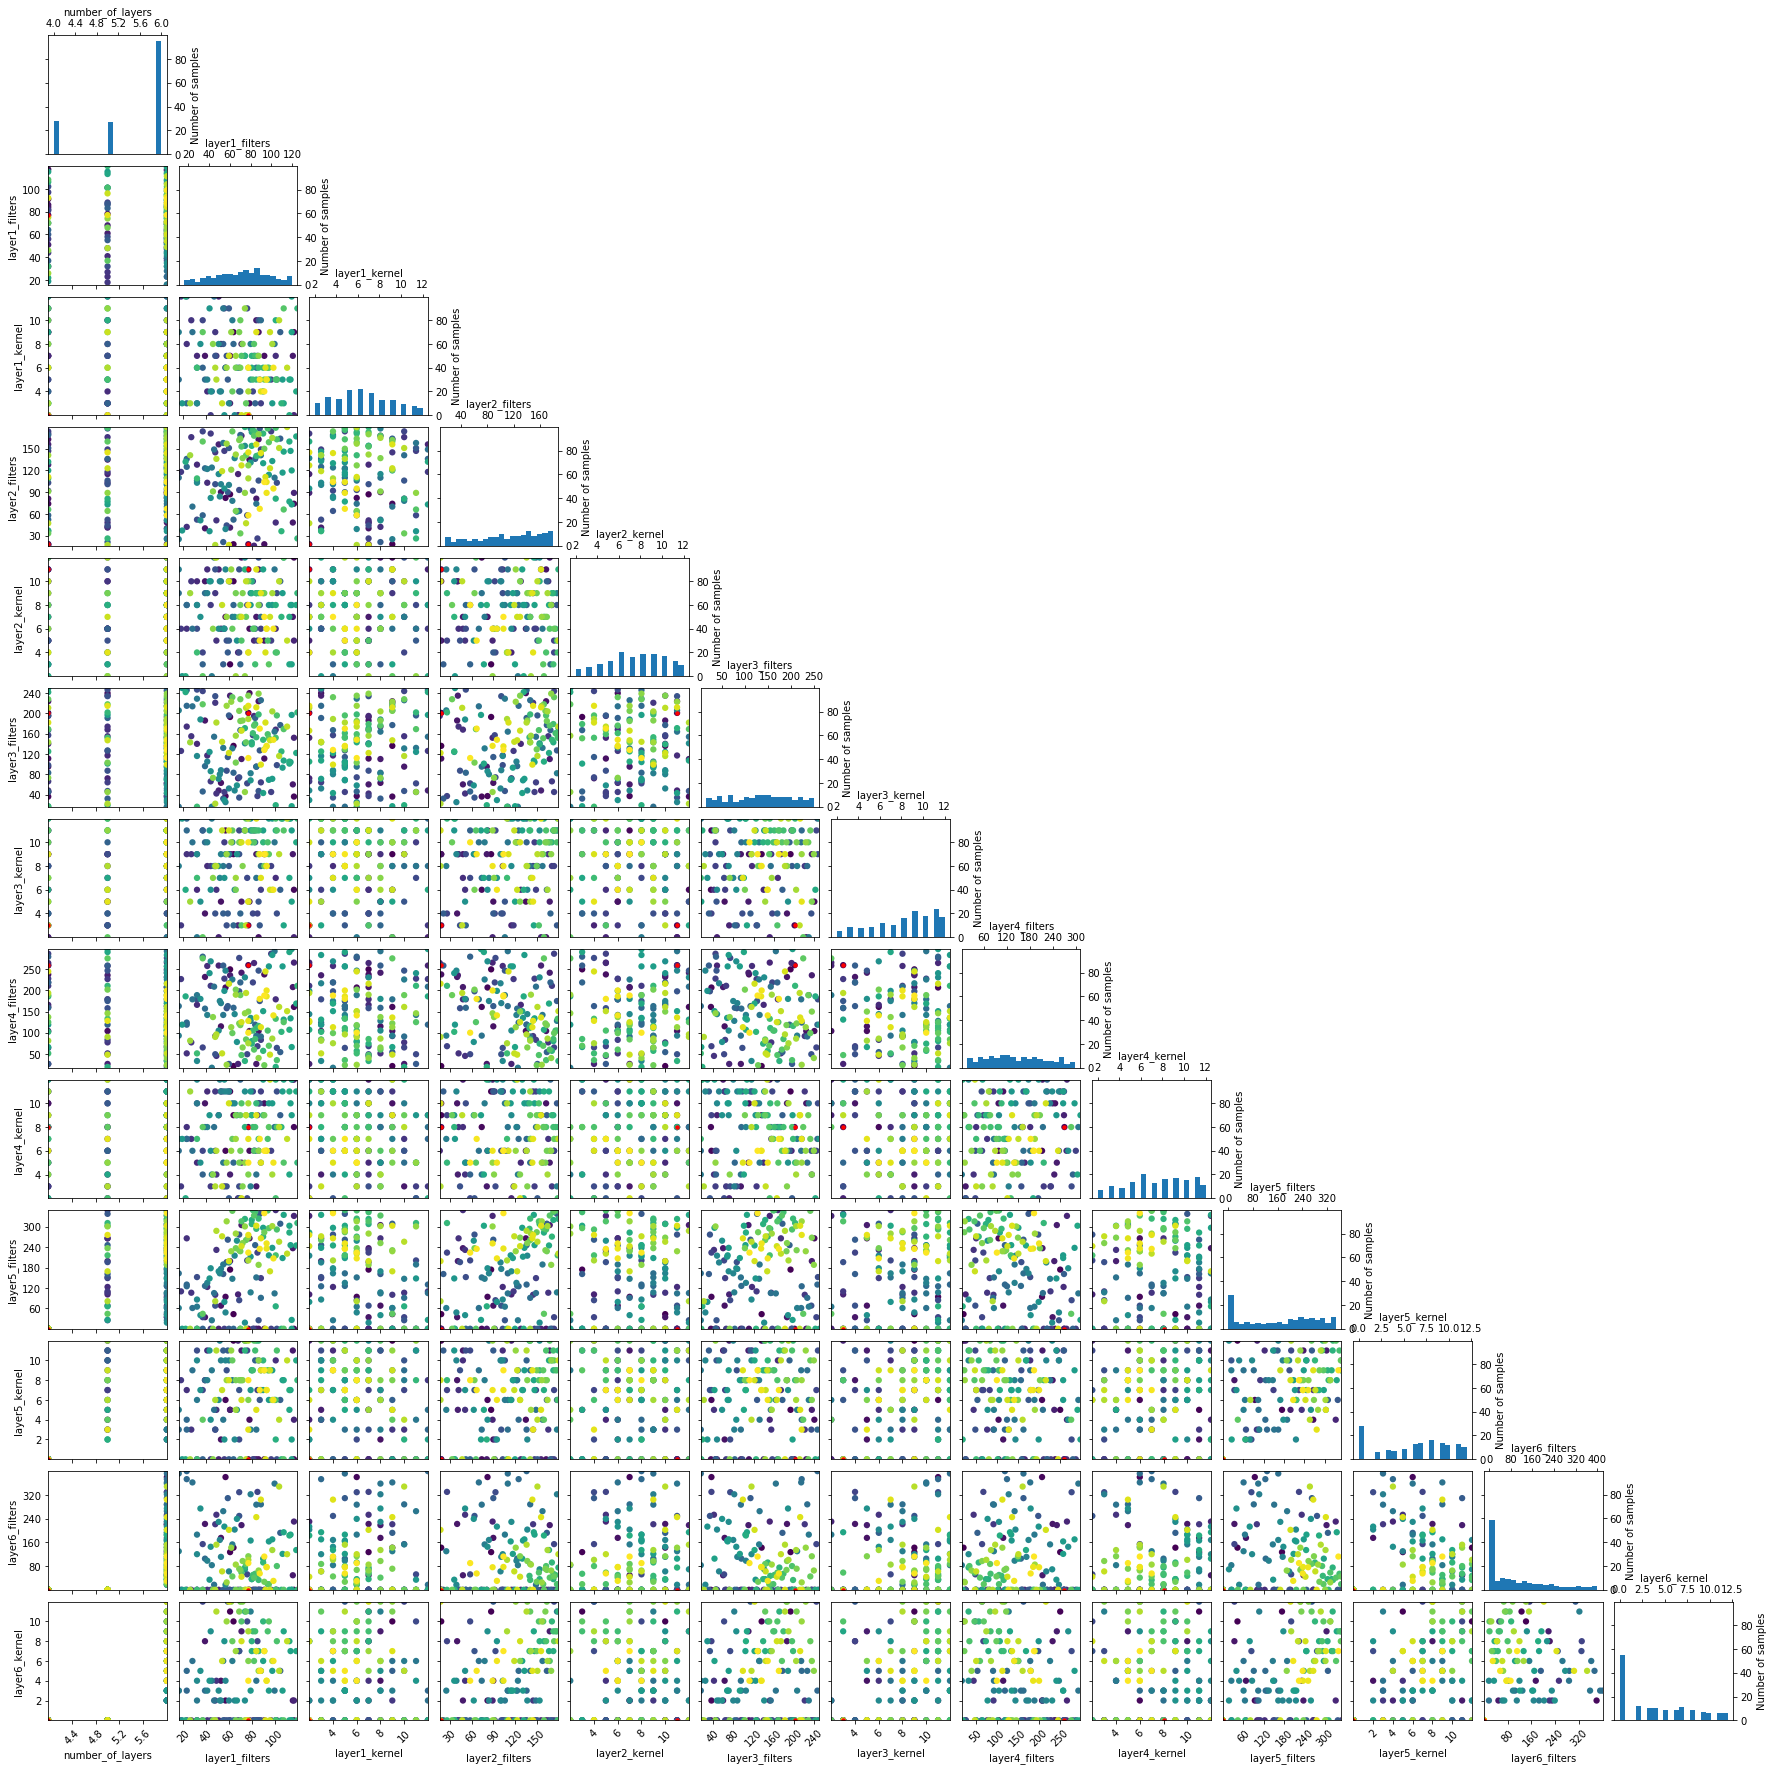

In [7]:
# NectarCam with optimized number of layers
plot_evaluations(mstn_layers_result)
plt.show()

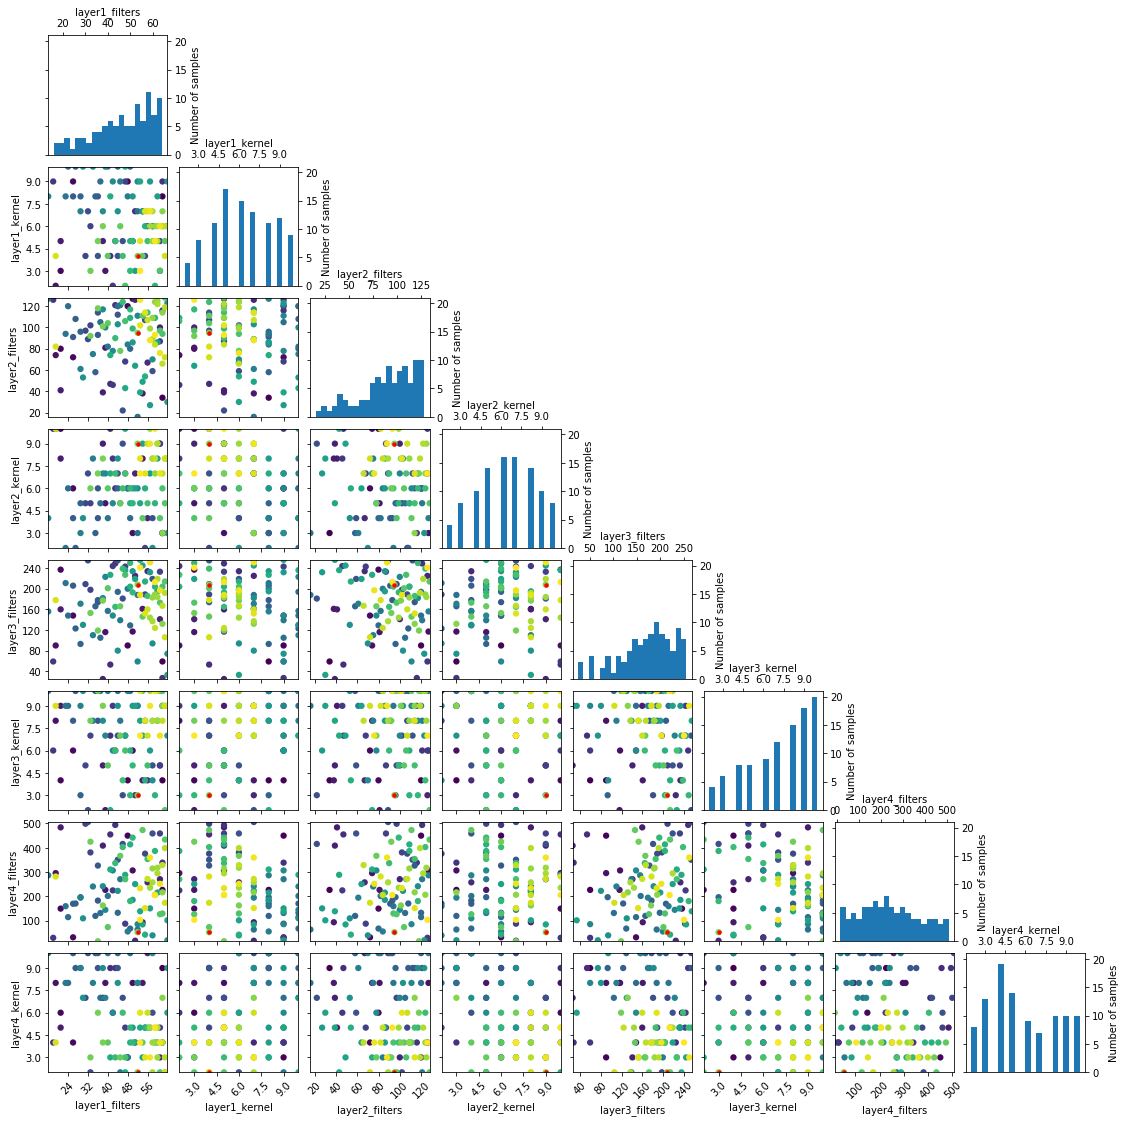

In [8]:
# NectarCam with fixed number of layers
plot_evaluations(mstn_result)
plt.show()

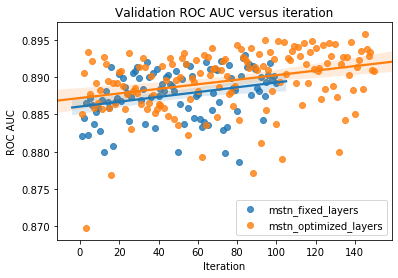

In [9]:
sns.regplot(mstn['iteration'], mstn['auc_val'], label = 'mstn_fixed_layers')
sns.regplot(mstn_layers['iteration'], mstn_layers['auc_val'], label = 'mstn_optimized_layers')

plt.xlabel('Iteration');plt.ylabel('ROC AUC' ); plt.title('Validation ROC AUC versus iteration'), plt.legend(loc="best");

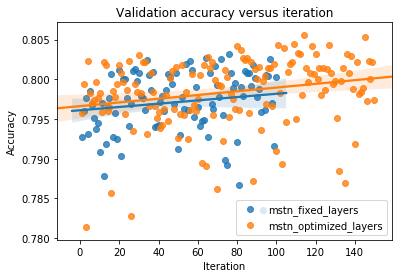

In [10]:
sns.regplot(mstn['iteration'], mstn['acc_val'], label = 'mstn_fixed_layers')
sns.regplot(mstn_layers['iteration'], mstn_layers['acc_val'], label = 'mstn_optimized_layers')

plt.xlabel('Iteration');plt.ylabel('ROC AUC' ); plt.title('Validation ROC AUC versus iteration'), plt.legend(loc="best");
plt.xlabel('Iteration');plt.ylabel('Accuracy' ); plt.title('Validation accuracy versus iteration'),plt.legend(loc="best");

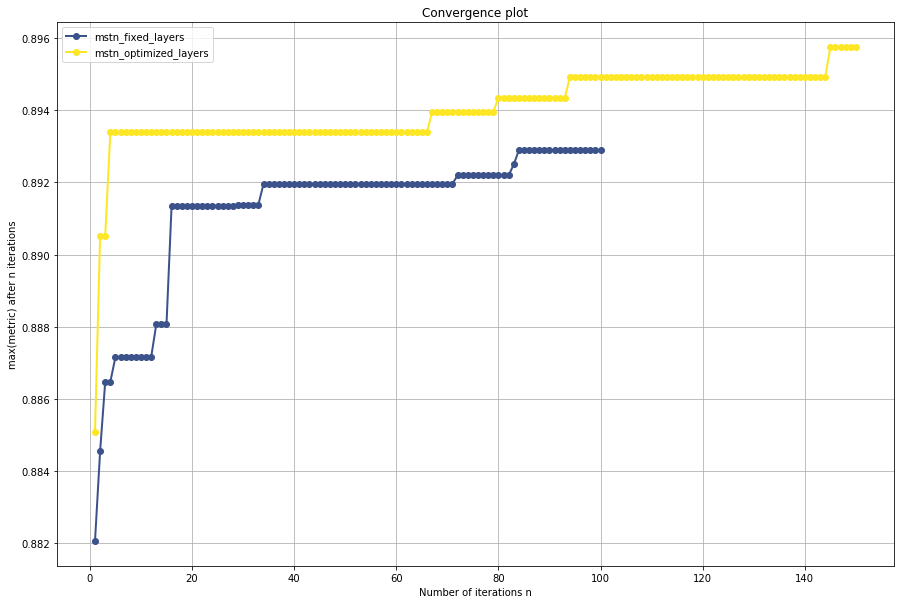

In [11]:
results = [('mstn_fixed_layers', mstn_result),('mstn_optimized_layers', mstn_layers_result)]
plt.figure(figsize=(15,10))
plot_convergence(*results)
plt.show()